In [183]:
import torch
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vlkit.optimal_transport import sinkhorn

In [197]:
def gaussian(mean=0, std=10, n=100):
    d = (-(torch.arange(n) - mean)**2 / (2 * std**2)).exp()
    d /= d.sum()
    return d

n = 20
d1 = gaussian(mean=12, std=2, n=n)
d2 = gaussian(mean=6, std=4, n=n)

dist = (torch.arange(n).view(1, n) - torch.arange(n).view(n, 1)).abs().float()
dist /= dist.max()

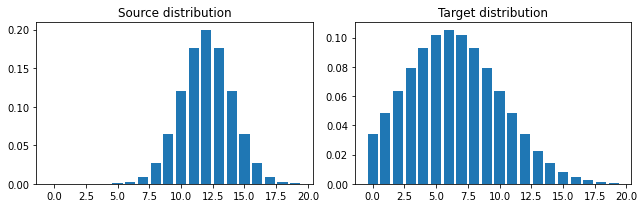

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
axes[0].bar(torch.arange(n), d1)
axes[0].set_title('Source distribution')
axes[1].bar(torch.arange(n), d2)
axes[1].set_title('Target distribution')
plt.tight_layout()
plt.savefig('source-target-distr.svg')

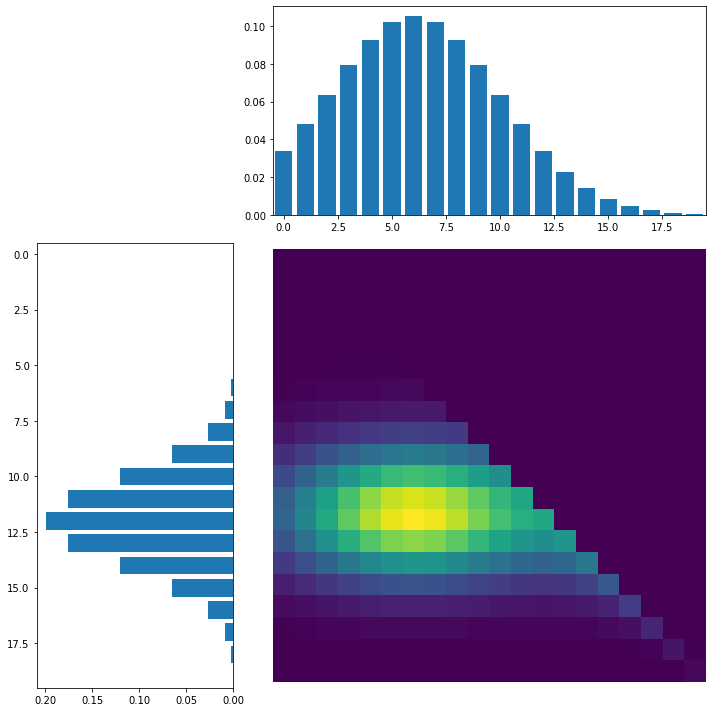

In [206]:
T, u, v = sinkhorn(r=d1.unsqueeze(dim=0), c=d2.unsqueeze(dim=0), reg=1e-2, M=dist.unsqueeze(dim=0))


plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0, 1:3])
plt.bar(torch.arange(n), d2, label='Target distribution')

ax2 = plt.subplot(gs[1:, 0])
ax2.barh(torch.arange(n), d1, label='Source distribution')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.subplot(gs[1:3, 1:3], sharex=ax1, sharey=ax2)
plt.imshow(T.squeeze(dim=0))
plt.axis('off')

plt.tight_layout()
plt.savefig('couples.svg')

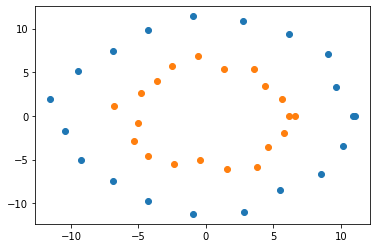

In [86]:
n = 20
theta = torch.linspace(0, 2*np.pi, n).view(n, 1)

r1 = torch.rand(size=(n, 1)) * 2 + 10
r2 = torch.rand(size=(n, 1)) * 2 + 5

d1 = torch.cat((torch.cos(theta) * r1, torch.sin(theta) * r1), dim=1)
d2 = torch.cat((torch.cos(theta) * r2, torch.sin(theta) * r2), dim=1)

plt.scatter(d1[:, 0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])

In [112]:
dist = torch.cdist(d1, d2, p=2).unsqueeze(dim=0)
dist /= dist.max()

reg = 1e-3

In [108]:
r = torch.ones(1, n) / n
c = torch.ones(1, n) / n

In [114]:
T, u, v = sinkhorn(r.double(), c.double(), M=dist.double(), reg=reg)

gr = reg * u.log()
gc = reg * v.log()

T.sum(dim=1)

tensor([[0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
         0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
         0.0500, 0.0500]], dtype=torch.float64)

In [97]:
T = ot.sinkhorn(r.view(n), c.view(n), dist.view(n, n), 1e-2)

In [100]:
T.max(dim=1)

torch.return_types.max(
values=tensor([[0.0246, 0.0473, 0.0472, 0.0474, 0.0478, 0.0485, 0.0484, 0.0469, 0.0472,
         0.0481, 0.0473, 0.0475, 0.0485, 0.0472, 0.0462, 0.0478, 0.0489, 0.0482,
         0.0476, 0.0242]], dtype=torch.float64),
indices=tensor([[19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19]]))